 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 03 : Classification</b>


This programming assignment offers you an opportunity to implement various linear classification models. You'll begin with straightforward algorithms like Least Squares classification, LDA, and FDA. Subsequently, you'll delve into implementing the perceptron algorithm. Lastly, you'll tackle probabilistic approaches for classification. To deepen your understanding of these methods, you'll compare their performance and application scenarios critically.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.


c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.


d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.




In [2]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

The accuracy of the Least-Squares Decision Boundary is:  91.25


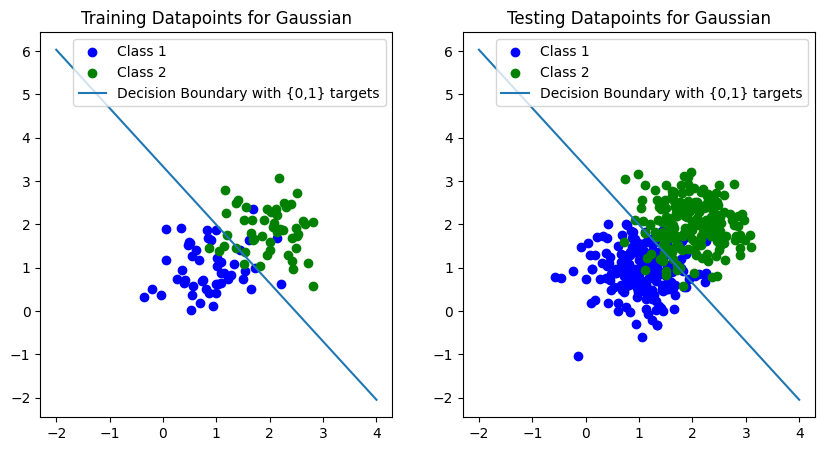

The accuracy of the Least-Squares Decision Boundary after changing labels is:  91.25


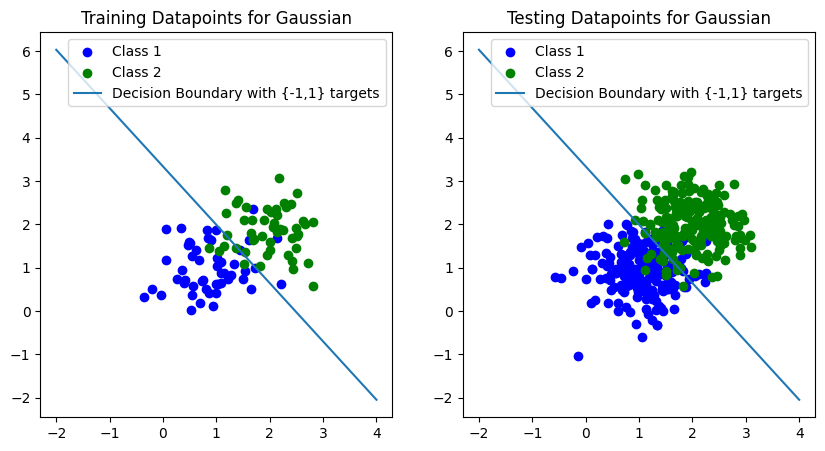

The accuracy of the Laplace predictions is:  93.0


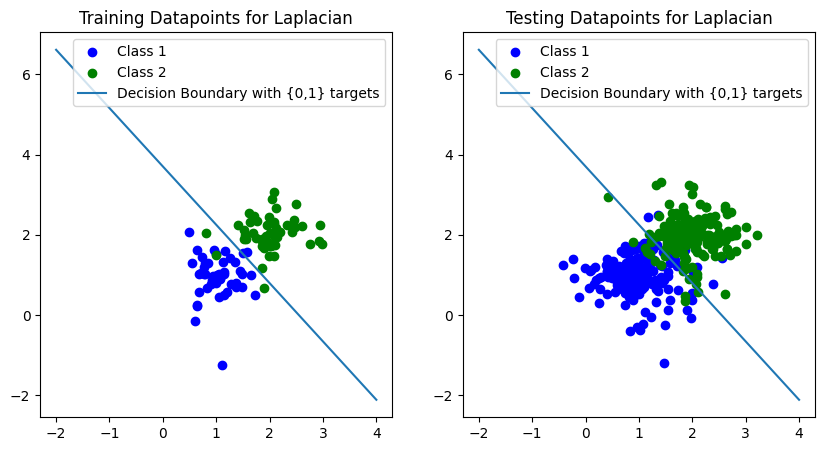

The accuracy of the Laplace predictions after changing labels is:  93.0


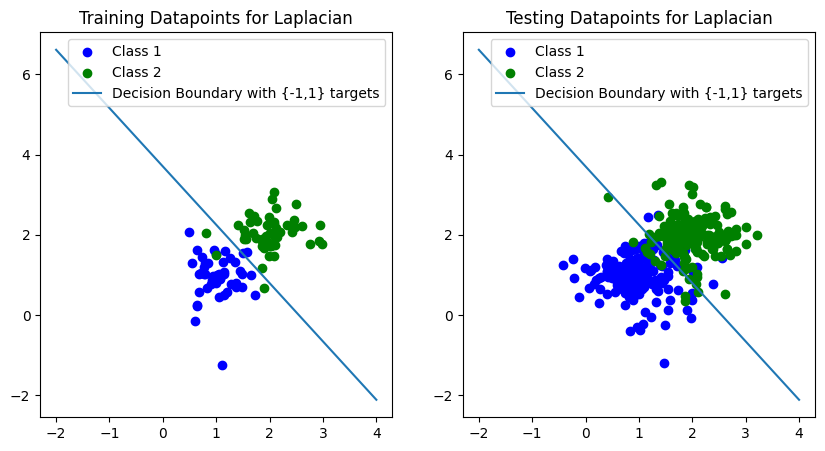

In [3]:

########################################
#Part-1)-a: Data generation
########################################

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]] # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.reshape(np.concatenate((np.zeros(50), np.ones(50))),(100,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.concatenate((class1_te, class2_te))  # Combine class1 testing and class2 testing data
te_targets = np.reshape(np.concatenate((np.zeros(200), np.ones(200))),(400,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.       #Class labels. Assign the value "0" to class1 and the value "1" to class2.


########################################
#Part-1)-b: Find the decision boundary
########################################
#Complete the below function
def LS_Classify(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Testing labels
    #Impliment pseudo inverse solution to get the weight vector
    X=np.hstack((np.ones((X_train.shape[0],1)),X_train))
    Y=Y_train.reshape((X_train.shape[0],1))
    w=np.linalg.inv(X.T@X)@X.T@Y
    Xt=np.hstack((np.ones((X_test.shape[0],1)),X_test))
    Y_test=Xt@w
    return Y_test,w

#Get the test data predictions


##########################################
#Part-1)-c: Evaluate the quality of decision boundary
##########################################
#Complete the below function
def LS_hard(Y_pred, a, b):
    c = []
    for i in Y_pred:
        if abs(a - i) > abs(b - i):
            c.append(b)
        else:
            c.append(a)
    return np.reshape(c, Y_pred.shape)

def LS_Classify_Accuracy(Y_pred, Y_test, a, b):
    # Inputs: Ground truth test labels and predicted test labels
    # Outputs: Accuracy
    # Calculate the number of correct predictions
    yi=LS_hard(Y_pred, a, b)
    correct=0
    for i in range(0,yi.shape[0]):
      if(yi[i]==Y_test[i]):
        correct+=1
    # Calculate the total number of predictions
    total = Y_test.shape[0]
    # Compute the accuracy
    accuracy = (correct / total) * 100
    return accuracy


predictions,w = LS_Classify(tr_data, tr_targets, te_data)
print("The accuracy of the Least-Squares Decision Boundary is: ",LS_Classify_Accuracy(predictions,te_targets,0,1))

##########################################
#Part-1)-d: Visualize the decision boundary
##########################################

fig,plot1=plt.subplots(1,2,figsize=(10, 5))
plot1[0].scatter(tr_data[:50,0],tr_data[:50,1],color='blue',label="Class 1")
plot1[0].scatter(tr_data[50:,0],tr_data[50:,1],color='green',label="Class 2")
plot1[1].scatter(te_data[:200,0],te_data[:200,1],color='blue',label="Class 1")
plot1[1].scatter(te_data[200:,0],te_data[200:,1],color='green',label="Class 2")
xvalues=np.linspace(-2,4,1000)
yvalues=((0.5-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1[0].plot(xvalues,yvalues,label="Decision Boundary with {0,1} targets")
plot1[1].plot(xvalues,yvalues,label="Decision Boundary with {0,1} targets")
plot1[0].legend()
plot1[1].legend()
plot1[0].set_title("Training Datapoints for Gaussian")
plot1[1].set_title("Testing Datapoints for Gaussian")
plt.show()


##########################################
#Part-1)-e: Change the target label notation, and repeat the experiments
##########################################
tr_targets = np.reshape(np.concatenate((np.full(50,-1), np.ones(50))),(100,1))
te_targets = np.reshape(np.concatenate((np.full(200,-1), np.ones(200))),(400,1))

predictions,w = LS_Classify(tr_data, tr_targets, te_data)
print("The accuracy of the Least-Squares Decision Boundary after changing labels is: ",LS_Classify_Accuracy(predictions,te_targets,-1,1))
fig,plot1=plt.subplots(1,2,figsize=(10, 5))
plot1[0].scatter(tr_data[:50,0],tr_data[:50,1],color='blue',label="Class 1")
plot1[0].scatter(tr_data[50:,0],tr_data[50:,1],color='green',label="Class 2")
plot1[1].scatter(te_data[:200,0],te_data[:200,1],color='blue',label="Class 1")
plot1[1].scatter(te_data[200:,0],te_data[200:,1],color='green',label="Class 2")
xvalues=np.linspace(-2,4,1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1[0].plot(xvalues,yvalues,label="Decision Boundary with {-1,1} targets")
plot1[1].plot(xvalues,yvalues,label="Decision Boundary with {-1,1} targets")
plot1[0].legend()
plot1[1].legend()
plot1[0].set_title("Training Datapoints for Gaussian")
plot1[1].set_title("Testing Datapoints for Gaussian")
plt.show()




##########################################
#Part-1)-f: Repeat the experiments with Laplacial distribution
##########################################
class1_tr = np.random.laplace(1, 0.3, size=(50,2))  # Class1 training data
class2_tr = np.random.laplace(2, 0.3, size=(50,2))  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.reshape(np.concatenate((np.zeros(50), np.ones(50))),(100,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.

class1_te = np.random.laplace(1, 0.3, size=(200,2))  # Class1 testing data
class2_te = np.random.laplace(2, 0.3, size=(200,2))  # Class2 testing data
te_data = np.concatenate((class1_te, class2_te))  # Combine class1 testing and class2 testing data
te_targets = np.reshape(np.concatenate((np.zeros(200), np.ones(200))),(400,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.       #Class labels. Assign the value "0" to class1 and the value "1" to class2.

predictions,w = LS_Classify(tr_data, tr_targets, te_data)
print("The accuracy of the Laplace predictions is: ",LS_Classify_Accuracy(predictions,te_targets,0,1))
fig,plot1=plt.subplots(1,2,figsize=(10, 5))
plot1[0].scatter(tr_data[:50,0],tr_data[:50,1],color='blue',label="Class 1")
plot1[0].scatter(tr_data[50:,0],tr_data[50:,1],color='green',label="Class 2")
plot1[1].scatter(te_data[:200,0],te_data[:200,1],color='blue',label="Class 1")
plot1[1].scatter(te_data[200:,0],te_data[200:,1],color='green',label="Class 2")
plot1[0].legend()
plot1[1].legend()
xvalues=np.linspace(-2,4,1000)
yvalues=((0.5-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1[0].plot(xvalues,yvalues,label="Decision Boundary with {0,1} targets")
plot1[1].plot(xvalues,yvalues,label="Decision Boundary with {0,1} targets")
plot1[0].legend()
plot1[1].legend()
plot1[0].set_title("Training Datapoints for Laplacian")
plot1[1].set_title("Testing Datapoints for Laplacian")
plt.show()


tr_targets = np.reshape(np.concatenate((np.full(50,-1), np.ones(50))),(100,1))
te_targets = np.reshape(np.concatenate((np.full(200,-1), np.ones(200))),(400,1))
predictions,w = LS_Classify(tr_data, tr_targets, te_data)
print("The accuracy of the Laplace predictions after changing labels is: ",LS_Classify_Accuracy(predictions,te_targets,-1,1))
fig,plot1=plt.subplots(1,2,figsize=(10, 5))
plot1[0].scatter(tr_data[:50,0],tr_data[:50,1],color='blue',label="Class 1")
plot1[0].scatter(tr_data[50:,0],tr_data[50:,1],color='green',label="Class 2")
plot1[1].scatter(te_data[:200,0],te_data[:200,1],color='blue',label="Class 1")
plot1[1].scatter(te_data[200:,0],te_data[200:,1],color='green',label="Class 2")
plot1[0].legend()
plot1[1].legend()
xvalues=np.linspace(-2,4,1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1[0].plot(xvalues,yvalues,label="Decision Boundary with {-1,1} targets")
plot1[1].plot(xvalues,yvalues,label="Decision Boundary with {-1,1} targets")
plot1[0].legend()
plot1[1].legend()
plot1[0].set_title("Training Datapoints for Laplacian")
plot1[1].set_title("Testing Datapoints for Laplacian")
plt.show()







<b> Report your observations </b>

1. The weight vector or the decision surface that we get on changing the target labels remain the same. This is because the relative magnitude of difference caused in the Error function remains same.

2. The laplace distribution has more points located towards their respective means. As a result, the Accuracy that we get in classification of Laplacian points is higher than that of Gaussian.

3. The accuracy of the linear classification model can be further improved by employing more robust approaches like perceptron rather than regression.

4. This method doesn't handle the true outliers correctly and can output incorrect decision boundaries.





<b> Part - (2) :  Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Report your observations.


3
[[ 0.        ]
 [-0.70777594]
 [-0.70643699]]


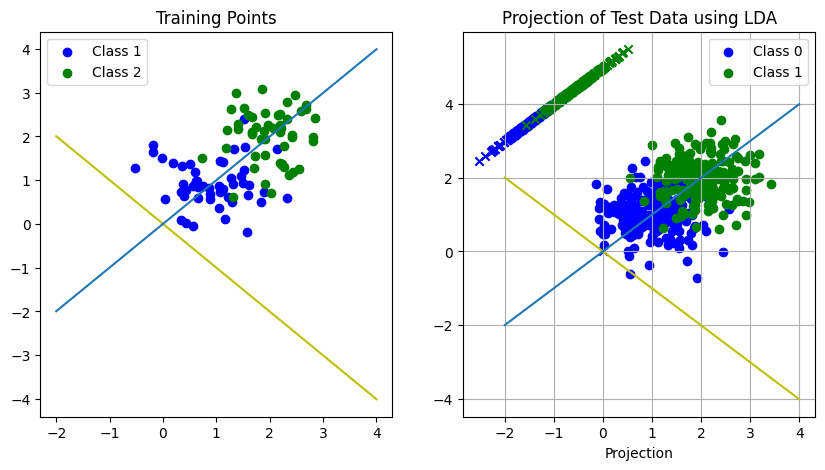

Accuracy with LDA: 92.0


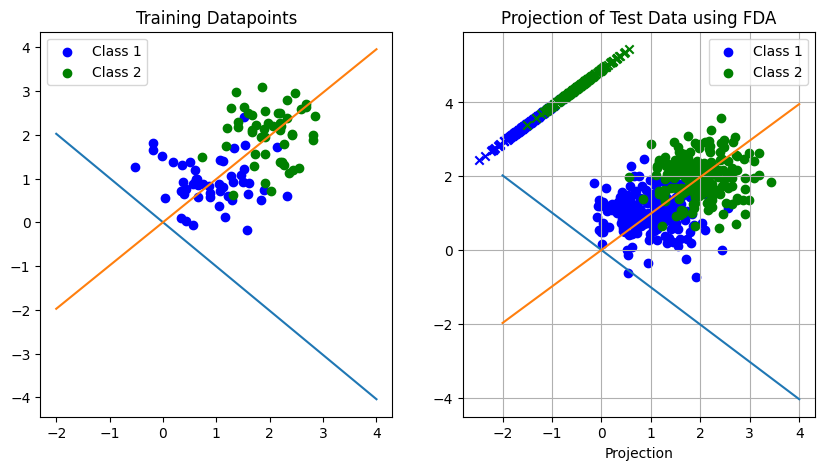

Accuracy with FDA: 92.0
Accuracy with FDA_K: 92.0


In [17]:
from os import name
########################################
#Part-2)-(a): Data generation
########################################

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]] # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.reshape(np.concatenate((np.zeros(50), np.ones(50))),(100,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.concatenate((class1_te, class2_te))  # Combine class1 testing and class2 testing data
te_targets = np.reshape(np.concatenate((np.zeros(200), np.ones(200))),(400,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.       #Class labels. Assign the value "0" to class1 and the value "1" to class2.



########################################
#Part-2)-(b)
########################################
#Complete the below function

globalpoint=[0,0]
def LDA_classify(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, and Testing data
    # Outputs: Between class covariance

    # Compute the mean vectors for each class
    X_train=np.hstack((np.ones((X_train.shape[0],1)),X_train))
    Y_train=Y_train.reshape((X_train.shape[0],1))
    X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
    mean_class1= np.array([0,0,0],dtype='float')
    mean_class2 = np.array([0,0,0],dtype='float')
    for i in range(0,X_train.shape[0]):
      if(Y_train[i]==0):
        mean_class1+=X_train[i]
      else:
        mean_class2+=X_train[i]
    print(mean_class1.shape[0])
    mean_class1=mean_class1/mean_class1[0]
    mean_class2=mean_class2/mean_class2[0]
    between_class_cov=np.identity(3)
    w = np.linalg.inv(between_class_cov) @ (mean_class1 - mean_class2)
    w=w.reshape((w.shape[0],1))
    w=w/np.linalg.norm(w)
    # Compute the threshold for classification
    threshold = 0.5 *( w.T@(mean_class1+mean_class2))
    globalpoint=(mean_class1+mean_class2)*0.5
    # Project the data onto 1-dimensional space
    projection = np.dot(X_test, w)
    # Compare projection with the threshold to make the decision
    predictions=[]
    for i in projection:
      if(i>=threshold):
        predictions.append(0)
      else:
        predictions.append(1)
    # Return weight vector and the predictions on testing data
    return np.reshape(predictions,(projection.shape[0],1)), w

predictions, w = LDA_classify(tr_data, tr_targets, te_data)
fig,plot1=plt.subplots(1,2,figsize=(10, 5))
plot1[0].scatter(tr_data[:50,0],tr_data[:50,1],color='blue',label="Class 1")
plot1[0].scatter(tr_data[50:,0],tr_data[50:,1],color='green',label="Class 2")
plot1[1].scatter(te_data[:200,0],te_data[:200,1],color='blue',label="Class 1")
plot1[1].scatter(te_data[200:,0],te_data[200:,1],color='green',label="Class 2")
plot1[0].set_title("Training Points")
plot1[1].set_title("Testing Points")
xvalues=np.linspace(-2,4,1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1[0].plot(xvalues,yvalues,color='y')
plot1[1].plot(xvalues,yvalues,color='y')
plot1[0].legend()
plot1[1].legend()
print(w)


def project_points_on_line(points, line_point1, line_point2):
    points = np.array(points)
    line_point1 = np.array(line_point1)
    line_point2 = np.array(line_point2)
    line_vector = line_point2 - line_point1
    projection_lengths = np.dot(points - line_point1, line_vector) / np.dot(line_vector, line_vector)
    projected_points = line_point1 + projection_lengths[:, np.newaxis] * line_vector
    return projected_points


def LDA_project(w, X_test, Y_test):
  #Inputs: weight vector, testing data, and testing labels
  w_n=np.reshape([w[0,0],-w[2,0],w[1,0]],(3,1))
  xvalues=np.linspace(-2,4,1000)
  yvalues=((-w_n[0,0]-w_n[1,0]*xvalues)/w_n[2,0])
  plot1[0].plot(xvalues,yvalues,label="Projected Line")
  plot1[1].plot(xvalues,yvalues,label="Projected Line")
  s=project_points_on_line(X_test,[-10,-5],[1-10,-5+w[2,0]/w[1,0]])
  X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
  plot1[1].scatter(s[:200,0],s[:200,1],color='b',marker='x')
  plot1[1].scatter(s[200:,0],s[200:,1],color='g',marker='x')
  s=project_points_on_line([globalpoint],[2,2],[2+1,2+w[2,0]/w[1,0]])
  plot1[1].scatter(s[:,0],s[:,1],color='b',marker='x')
  plot1[1].set_xlabel('Projection')
  plot1[1].set_title('Projection of Test Data using LDA')
  plot1[1].legend(['Class 0', 'Class 1'])
  plot1[1].grid(True)
  plt.show()
  #Project the test data onto 1-dimensional space
  #Plot the projections


LDA_project(w, te_data, te_targets)
#Compute and print the accuracy
acc=LS_Classify_Accuracy(predictions,te_targets,0,1)
print('Accuracy with LDA:', acc)


########################################
#Part-2)-(c)
########################################
def FDA_classify(X_train, Y_train, X_test):
 # Inputs: Training data, Training labels, and Testing data
    # Outputs: Between class covariance

    # Compute the mean vectors for each class
    X_train=np.hstack((np.ones((X_train.shape[0],1)),X_train))
    Y_train=Y_train.reshape((X_train.shape[0],1))
    X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
    mean_class1= np.array([0,0,0],dtype='float')
    mean_class2 = np.array([0,0,0],dtype='float')
    for i in range(0,X_train.shape[0]):
      if(Y_train[i]==0):
        mean_class1+=X_train[i]
      else:
        mean_class2+=X_train[i]
    mean_class1=mean_class1/mean_class1[0]
    mean_class2=mean_class2/mean_class2[0]
    # Compute the between-class scatter matrix
    cov_class1 = np.cov(X_train[:int(X_train.shape[0]/2)].T)
    cov_class2 = np.cov(X_train[int(X_train.shape[0]/2):].T)
    Sw=cov_class1+cov_class2
    between_class_cov=np.identity(3)
    # between_class_cov = np.outer((mean_class1 - mean_class2), (mean_class1 - mean_class2))
    lamda=1e-10
    Sw+=lamda*np.identity(Sw.shape[0])

    # Compute the weight vector (LDA projection vector)
    # print(mean_class1,mean_class2,between_class_cov)
    w = np.linalg.inv(Sw) @ (mean_class1 - mean_class2)
    w=w.reshape((w.shape[0],1))
    w=w/np.linalg.norm(w)
    # Compute the threshold for classification
    threshold = 0.5 *( w.T@(mean_class1+mean_class2))

    # Project the data onto 1-dimensional space
    projection = np.dot(X_test, w)
    # Compare projection with the threshold to make the decision
    predictions=[]
    for i in projection:
      if(i>=threshold):
        predictions.append(0)
      else:
        predictions.append(1)
    # Return weight vector and the predictions on testing data
    return np.array(predictions), w


predictions,w = FDA_classify(tr_data, tr_targets, te_data)
fig,plot1=plt.subplots(1,2,figsize=(10, 5))
plot1[0].scatter(tr_data[:50,0],tr_data[:50,1],color='blue',label="Class 1")
plot1[0].scatter(tr_data[50:,0],tr_data[50:,1],color='green',label="Class 2")
plot1[1].scatter(te_data[:200,0],te_data[:200,1],color='blue',label="Class 1")
plot1[1].scatter(te_data[200:,0],te_data[200:,1],color='green',label="Class 2")
plot1[0].legend()
plot1[1].legend()
xvalues=np.linspace(-2,4,1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1[0].plot(xvalues,yvalues)
plot1[1].plot(xvalues,yvalues)

def FDA_project(w, X_test, Y_test):
  #Inputs: weight vector, testing data, and testing labels
  w_n=np.reshape([w[0,0],-w[2,0],w[1,0]],(3,1))
  xvalues=np.linspace(-2,4,1000)
  yvalues=((-w_n[0,0]-w_n[1,0]*xvalues)/w_n[2,0])
  plot1[0].plot(xvalues,yvalues,label="Projected Line")
  plot1[0].set_title('Training Datapoints')
  plot1[1].plot(xvalues,yvalues,label="Projected Line")
  s=project_points_on_line(X_test,[-10,-5],[1-10,-5+w[2,0]/w[1,0]])
  X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
  plot1[1].scatter(s[:200,0],s[:200,1],color='b',marker='x')
  plot1[1].scatter(s[200:,0],s[200:,1],color='g',marker='x')
  plot1[1].set_xlabel('Projection')
  plot1[1].set_title('Projection of Test Data using FDA')
  plot1[1].legend(['Class 1', 'Class 2'])
  plot1[1].grid(True)
  plt.show()
  #Project the test data onto 1-dimensional space
  return 0


FDA_project(w, te_data, te_targets)
acc=LS_Classify_Accuracy(predictions,te_targets,0,1)
print('Accuracy with FDA:', acc)

########################################
#Part-2)-(d)
########################################
def FDA_project_K(X_train, Y_train, X_test, k):
  X_train=np.hstack((np.ones((X_train.shape[0],1)),X_train))
  Y_train=Y_train.reshape((X_train.shape[0],1))
  X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
  mean_class1= np.array([0,0,0],dtype='float')
  mean_class2 = np.array([0,0,0],dtype='float')
  for i in range(0,X_train.shape[0]):
    if(Y_train[i]==0):
      mean_class1+=X_train[i]
    else:
      mean_class2+=X_train[i]
  mean_class1=np.reshape(mean_class1/mean_class1[0],(3,1))
  mean_class2=np.reshape(mean_class2/mean_class2[0],(3,1))
  # Compute the between-class scatter matrix
  cov_class1 = np.cov(X_train[:int(X_train.shape[0]/2)].T)
  cov_class2 = np.cov(X_train[int(X_train.shape[0]/2):].T)
  Sw=cov_class1+cov_class2
  d=mean_class1-mean_class2
  print(d)
  Sb=(mean_class1-mean_class2)@((mean_class1-mean_class2).T)
  lamda=0.00001
  # Compute the weight vector (LDA projection vector)
  Sw=Sw+np.identity(Sw.shape[0])*lamda
  print(Sb.shape,Sw.shape)
  matrix=np.linalg.inv(Sw)@Sb

  eigenvalues, eigenvectors = np.linalg.eig(matrix)
  print(eigenvectors)
  w = eigenvectors[:,k]
  w=w.reshape((3,1))
  # Compute the threshold for classification
  threshold = 0.5 *( w.T@(mean_class1+mean_class2))

  # Project the data onto 1-dimensional space
  projection = np.dot(X_test, w)
  # Compare projection with the threshold to make the decision
  predictions=[]
  for i in projection:
    if(i>=threshold):
      predictions.append(0)
    else:
      predictions.append(1)
  # Return weight vector and the predictions on testing data
  return np.array(predictions), w


def FDA_project_l(w, X_test, Y_test):
  #Inputs: weight vector, testing data, and testing labels
  w_n=np.reshape([w[0,0],-w[2,0],w[1,0]],(3,1))
  # w_n,w=w,w_n
  xvalues=np.linspace(-2,4,1000)
  yvalues=((-w_n[0,0]-w_n[1,0]*xvalues)/w_n[2,0])
  plot1[0].plot(xvalues,yvalues,label="Projected Line")
  plot1[1].plot(xvalues,yvalues,label="Projected Line")
  plot1[0].set_title('Training Datapoints')
  s=project_points_on_line(X_test,[-10,-5],[1-10,-5+w[2,0]/w[1,0]])
  plot1[1].scatter(s[:200,0],s[:200,1],color='b',marker='x')
  plot1[1].scatter(s[200:,0],s[200:,1],color='g',marker='x')
  X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
  plot1[1].legend()
  plot1[1].set_xlabel('Projection')
  plot1[1].set_title('Projection of Test Data using FDA_K')
  plot1[1].legend(['Class 0', 'Class 1'])
  plot1[1].grid(True)
  plt.show()
  #Project the test data onto 1-dimensional space
  return 0


FDA_project_l(w, te_data, te_targets)
acc=LS_Classify_Accuracy(predictions,te_targets,0,1)
print('Accuracy with FDA_K:', acc)



<b> Report your observations </b>

1. Linear Discriminant analysis ensures that the means of the projected data are as highly separated as possible.

2. However this method doesn't handle the errors caused due to the overlapping of the projected datapoints.

3. Finding the appropriate threshold is also a challenging task as we dont take into account the variance of the data.

4. FDA is an improvement over LDA as it tries to take into account even the variance in the data.

5. The accuracy of both the models is around 92% in this example. The multiclass FDA model which projects into to K dimensional space is much better and yields slightly higher accuracy.



<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.


b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.
  

e). Report your observations


[[-204.        ]
 [  58.36462168]
 [  57.4062796 ]]
Accuracy with Perceptron: 82.25
[[-1.87680271]
 [ 0.63486008]
 [ 0.59408914]]


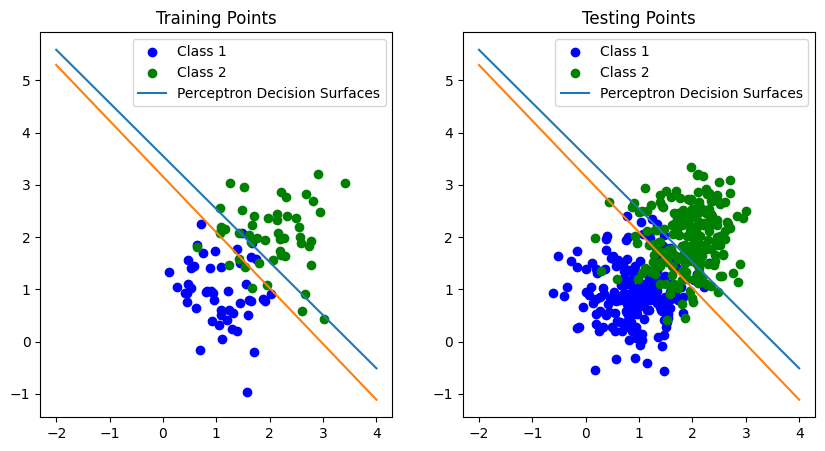

[[-199.        ]
 [  55.47988898]
 [  57.0537077 ]]
[[-1.45269136]
 [ 0.536939  ]
 [ 0.38216563]]


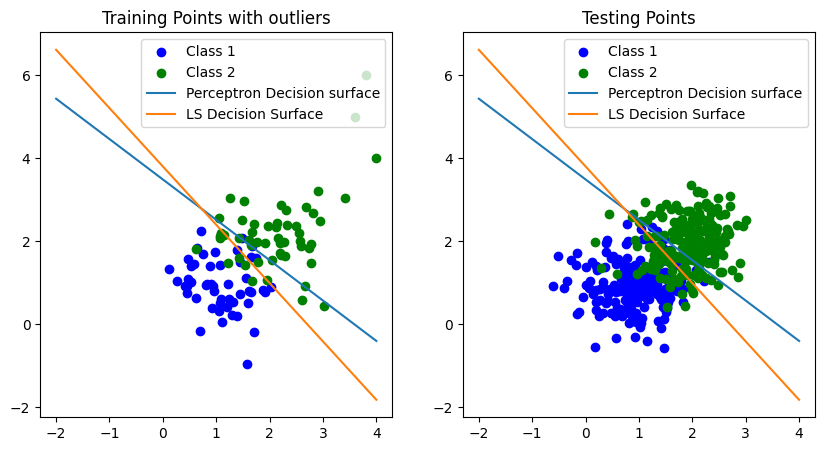

[[-47.        ]
 [-41.21603102]
 [-52.73601105]]


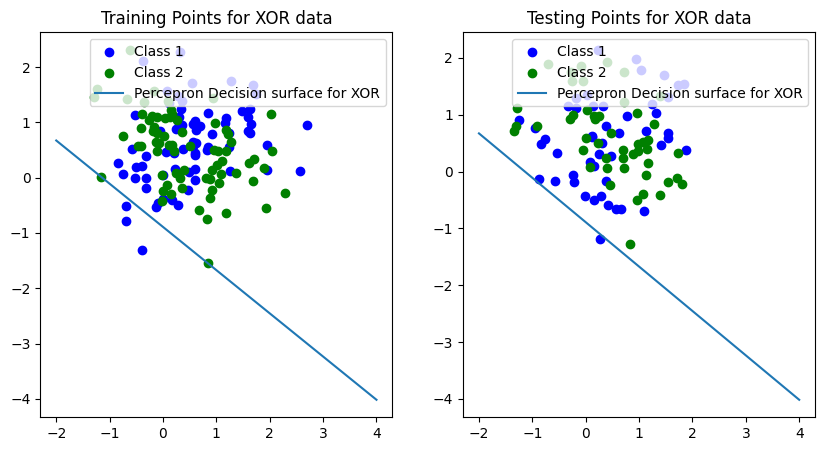

In [33]:
########################################
#Part-3)-(a): Data generation
########################################

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]] # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.reshape(np.concatenate((np.full(50,-1), np.ones(50))),(100,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.concatenate((class1_te, class2_te))  # Combine class1 testing and class2 testing data
te_targets = np.reshape(np.concatenate((np.full(200,-1), np.ones(200))),(400,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.       #Class labels. Assign the value "0" to class1 and the value "1" to class2.

tr_targets = np.reshape(np.concatenate((np.full(50,-1), np.ones(50))),(100,1))
te_targets = np.reshape(np.concatenate((np.full(200,-1), np.ones(200))),(400,1))

########################################
#Part-3)-(b)
########################################
def Perceptron(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, Testing data
    #Outputs: Testing data predictions, Weight vector representing the decision boundary
    epochs = 200    #Number of epochs
    X_train=np.hstack((np.ones((X_train.shape[0],1)),X_train))
    Y_train=Y_train.reshape((X_train.shape[0],1))
    X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
    w_g=np.zeros((X_train.shape[1],1))
    for epoch in range(0,epochs,1):
        #Compute the predictions
        pre=X_train@w_g
        pre=LS_hard(pre, -1, 1)
        err=np.linalg.norm(pre-Y_train)
        for i in range(X_train.shape[0]):
          if(pre[i]!=Y_train[i]):
            # print(X_train[i],Y_train[i])
            x=X_train[i].reshape((X_train.shape[1],1))
            w_g+=x*int(Y_train[i][0])
        #Compute the error

        #Update the weight vector


    #Compute the test data predicitions using the final weight vector
    finalpred=X_test@w_g
    #Return the test data predictions and the final weight vector
    return finalpred, w_g


##########################################
#Plot the decision boundary using perceptron
##########################################
predictions,w = Perceptron(tr_data, tr_targets, te_data)
fig,plot1=plt.subplots(1,2,figsize=(10, 5))
plot1[0].scatter(tr_data[:50,0],tr_data[:50,1],color='blue',label="Class 1")
plot1[0].scatter(tr_data[50:,0],tr_data[50:,1],color='green',label="Class 2")
plot1[1].scatter(te_data[:200,0],te_data[:200,1],color='blue',label="Class 1")
plot1[1].scatter(te_data[200:,0],te_data[200:,1],color='green',label="Class 2")
plot1[0].legend()
plot1[1].legend()
print(w)
xvalues=np.linspace(-2,4,1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1[0].plot(xvalues,yvalues,label="Perceptron Decision Surfaces")
plot1[1].plot(xvalues,yvalues,label="Perceptron Decision Surfaces")
plot1[0].set_title("Training Points")
plot1[1].set_title("Testing Points")
plot1[1].legend()
plot1[0].legend()

acc=LS_Classify_Accuracy(predictions,te_targets,-1,1)
print('Accuracy with Perceptron:', acc)

##########################################
#Plot the decision boundary using least squares
##########################################
predictions,w = LS_Classify(tr_data, tr_targets, te_data)

print(w)
xvalues=np.linspace(-2,4,1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1[0].plot(xvalues,yvalues,label="LS Decision Surface")
plot1[1].plot(xvalues,yvalues,label="LS Decision Surface")
plt.show()




##########################################
#Part-3)-(c): Repeat the experiments with the true outliers added to the data. Compare and contrast the perceptron algorithm with least squares method
##########################################

outliers=np.array([[4,4],[3.6,5],[3.8,6]])
tr_data=np.concatenate((tr_data,outliers))
tr_targets=np.concatenate((tr_targets,np.array([[1],[1],[1]])))
predictions,w = Perceptron(tr_data, tr_targets, te_data)
fig,plot1=plt.subplots(1,2,figsize=(10, 5))
plot1[0].scatter(tr_data[:50,0],tr_data[:50,1],color='blue',label="Class 1")
plot1[0].scatter(tr_data[50:,0],tr_data[50:,1],color='green',label="Class 2")
plot1[1].scatter(te_data[:200,0],te_data[:200,1],color='blue',label="Class 1")
plot1[1].scatter(te_data[200:,0],te_data[200:,1],color='green',label="Class 2")
plot1[0].set_title("Training Points with outliers")
plot1[1].set_title("Testing Points")
plot1[0].legend()
plot1[1].legend()
print(w)
xvalues=np.linspace(-2,4,1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1[0].plot(xvalues,yvalues,label="Perceptron Decision surface")
plot1[1].plot(xvalues,yvalues,label="Perceptron Decision surface")
predictions,w = LS_Classify(tr_data, tr_targets, te_data)

print(w)
xvalues=np.linspace(-2,4,1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1[0].plot(xvalues,yvalues,label="LS Decision Surface")
plot1[1].plot(xvalues,yvalues,label="LS Decision Surface")
plot1[0].legend()
plot1[1].legend()
plt.show()


##########################################
# 3(d)

mean1 = [0,0]           # Mean of class1
mean3 = [0, 1]           # Mean of class2
mean2=  [1,1]
mean4= [1,0]
cov = [[0.3, 0], [0, 0.3]] # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 36)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 36)  # Class2 training data
class1_tr2 = np.random.multivariate_normal(mean3, cov, 36)  # Class1 training data
class2_tr2 = np.random.multivariate_normal(mean4, cov, 36)
tr_data2=np.concatenate((class1_tr2, class2_tr2))
tr_data = np.concatenate((class1_tr, class2_tr))
tr_data=np.concatenate((tr_data,tr_data2)) # Combine class1 training and class2 training data
tr_targets = np.reshape(np.concatenate((np.full(72,-1), np.ones(72))),(144,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.

class1_te = np.random.multivariate_normal(mean1, cov, 24)  # Class1 training data
class2_te = np.random.multivariate_normal(mean2, cov, 24)  # Class2 training data
class1_te2 = np.random.multivariate_normal(mean3, cov, 24)  # Class1 training data
class2_te2 = np.random.multivariate_normal(mean4, cov, 24)
te_data2=np.concatenate((class1_te2, class2_te2))
te_data = np.concatenate((class1_te, class2_te))
te_data=np.concatenate((te_data,te_data2)) # Combine class1 training and class2 training data
te_targets = np.reshape(np.concatenate((np.full(48,-1), np.ones(48))),(96,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.

predictions,w = Perceptron(tr_data, tr_targets, te_data)
fig,plot1=plt.subplots(1,2,figsize=(10, 5))
plot1[0].scatter(tr_data[:72,0],tr_data[:72,1],color='blue',label="Class 1")
plot1[0].scatter(tr_data[72:,0],tr_data[72:,1],color='green',label="Class 2")
plot1[1].scatter(te_data[:48,0],te_data[:48,1],color='blue',label="Class 1")
plot1[1].scatter(te_data[48:,0],te_data[48:,1],color='green',label="Class 2")
plot1[0].set_title("Training Points for XOR data")
plot1[1].set_title("Testing Points for XOR data")
plot1[0].legend()
plot1[1].legend()
print(w)
xvalues=np.linspace(-2,4,1000)
yvalues=(-w[0,0]-w[1,0]*xvalues)/w[2,0]
plot1[0].plot(xvalues,yvalues,label="Percepron Decision surface for XOR")
plot1[1].plot(xvalues,yvalues,label="Percepron Decision surface for XOR")
plot1[0].legend()
plot1[1].legend()

plt.show()



<b> Report your observations </b>

1. The perceptron algorithm requires slightly higher computations as the weight vector is updated for all the wrong points in each iteration.

2. It is handling the very true outliers better than LS method as it does'nt disturb the weight vector once all the points are correctly classified

3. When there are no outliers, Both LS and perceptron give simialar accuracies and almost overlap.

4. However when there are outliers, Perceptron performs much better than LS.

5. The perceptron algorithm cannot handle the non linear data that is when there is no linear surface available to separate the data.For Ex:- The XOR problem of classification cant be handled alone by perceptron.



<b> Part (4) : Understanding the decision boundaries of MAP approach to classification - </b> Decision boundary in 2 class classification problem is the locus of points satisfying $p(c_{1}/x)$ = $p(c_{2}/x)$. Where $c_{1}$ and $c_{2}$ are the class indicators and $x$ is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

**a). Class distributions share the same covariance matrix: Linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 4  \\ 1 \end{bmatrix}$, and $\Sigma_{1}= \Sigma_{2} = \Sigma =  \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**b). Class distributions have different covariance matrices: Non-linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 3  \\ 1 \end{bmatrix}$, $\Sigma_{1}=   \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.02 \end{bmatrix}$, and $\Sigma_{2}=   \begin{bmatrix} 0.02 & 0.0  \\ 0.0 & 0.2 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**c). Report your observations**




[[  9.22490867]
 [-10.34417507]
 [ -9.5467918 ]]


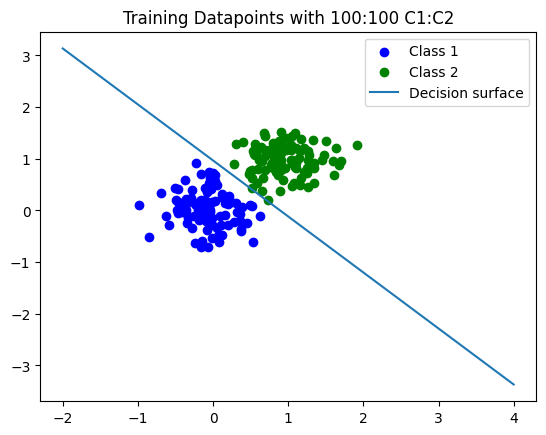

[[  9.28775276]
 [ -9.87501966]
 [-10.48987317]]


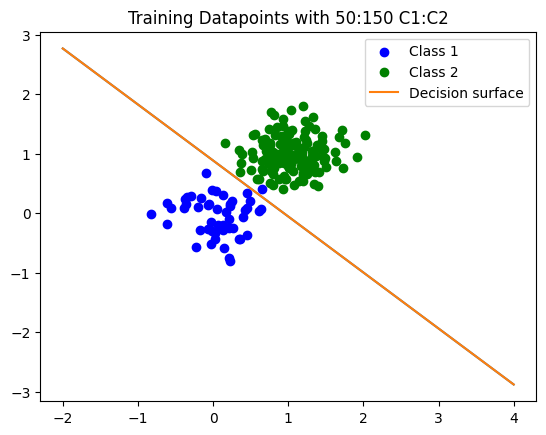

[[ 11.28951186]
 [-10.15987672]
 [ -9.98503018]]


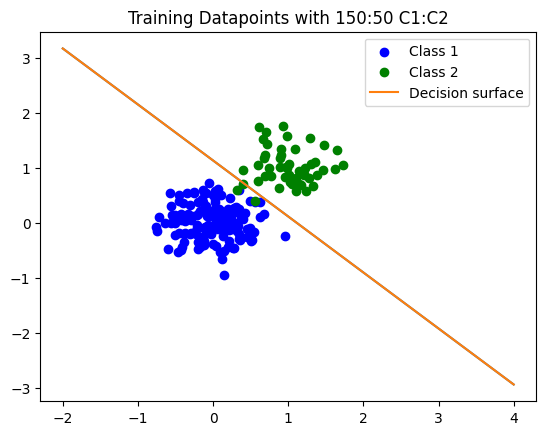

In [27]:
##########################################
#Part-4a)-0: Data Generation
##########################################
def decisionBoundary(X_train, Y_train):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w
    N1=0
    mean_1 = [0,0]
    mean_2 = [0,0]
    for i in range(Y_train.shape[0]):
      if(Y_train[i]==-1):
        N1+=1
        mean_1+=X_train[i]
      else:
        mean_2+=X_train[i]
    mean_1=mean_1/N1
    mean_2=mean_2/(Y_train.shape[0]-N1)
    p_c1 =N1/Y_train.shape[0]
    p_c2 = 1. - p_c1
    cov1 = np.zeros((2,2))
    cov2 = np.zeros((2,2))
    for i in range(Y_train.shape[0]):
      if(Y_train[i]==-1):
        h=np.reshape(X_train[i]-mean_1,(2,1))
        cov1+=(h).T@h
      else:
        h=np.reshape(X_train[i]-mean_2,(2,1))
        cov2+=h.T@h

    w = np.linalg.inv(cov)@(mean_1-mean_2)
    w0 = -0.5*(mean_1.T@np.linalg.inv(cov)@mean_1)+0.5*(mean_2.T@np.linalg.inv(cov)@mean_2)+np.log(p_c1/p_c2)

    return np.array([w0]+list(w))





m1 = [1,1]
m2 = [4,1]
cov = [[0.1,0.0],[0.0,0.1]]

#Case1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 100)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 100)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.reshape(np.concatenate((np.full(100,-1), np.ones(100))),(200,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
w=decisionBoundary(tr_data,tr_targets)
w=np.reshape(w,(3,1))
w=decisionBoundary(tr_data,tr_targets)
w=np.reshape(w,(3,1))
plot1=plt.subplot()
plot1.scatter(tr_data[:100,0],tr_data[:100,1],color='blue',label="Class 1")
plot1.scatter(tr_data[100:,0],tr_data[100:,1],color='green',label="Class 2")
plot1.set_title("Training Datapoints with 100:100 C1:C2")
print(w)
xvalues=np.linspace(-2,4,1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1.plot(xvalues,yvalues,label="Decision surface")
plot1.legend()
plt.show()


#Case2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 150)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.reshape(np.concatenate((np.full(50,-1), np.ones(150))),(200,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
w=decisionBoundary(tr_data,tr_targets)
w=np.reshape(w,(3,1))
w=decisionBoundary(tr_data,tr_targets)
w=np.reshape(w,(3,1))
plot1=plt.subplot()
plot1.scatter(tr_data[:50,0],tr_data[:50,1],color='blue',label="Class 1")
plot1.scatter(tr_data[50:,0],tr_data[50:,1],color='green',label="Class 2")
plot1.set_title("Training Datapoints with 50:150 C1:C2")
print(w)
xvalues=np.linspace(-2,4,1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1.plot(xvalues,yvalues)
plot1.plot(xvalues,yvalues,label="Decision surface")
plot1.legend()
plt.show()


#Case3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 150)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.reshape(np.concatenate((np.full(150,-1), np.ones(50))),(200,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.

w=decisionBoundary(tr_data,tr_targets)
w=np.reshape(w,(3,1))
plot1=plt.subplot()
plot1.scatter(tr_data[:150,0],tr_data[:150,1],color='blue',label="Class 1")
plot1.scatter(tr_data[150:,0],tr_data[150:,1],color='green',label="Class 2")
plot1.set_title("Training Datapoints with 150:50 C1:C2")
print(w)
xvalues=np.linspace(-2,4,1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1.plot(xvalues,yvalues)
plot1.plot(xvalues,yvalues,label="Decision surface")
plot1.legend()
plt.show()

##########################################
#Part-4a)-4: Plot the decision regions for all the three cases
##########################################
#Complete the below function


#Plot the decision regions




[[ 0.15007804 -0.00101606]
 [-0.00101606  0.02129349]]
[2.99758885 0.98267221]
[[ 6.66535314  0.31804888]
 [ 0.31804888 46.9778771 ]]
[[1.00000000e+00 1.17407001e-18]
 [1.43915231e-18 1.00000000e+00]]


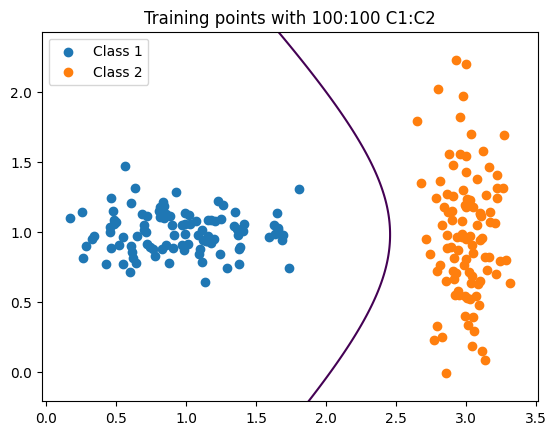

[[0.17660244 0.00352805]
 [0.00352805 0.0212996 ]]
[3.00361776 0.99372834]
[[ 5.6812352  -0.94103437]
 [-0.94103437 47.1051036 ]]
[[ 1.00000000e+00 -3.79760614e-17]
 [-4.35364453e-19  1.00000000e+00]]


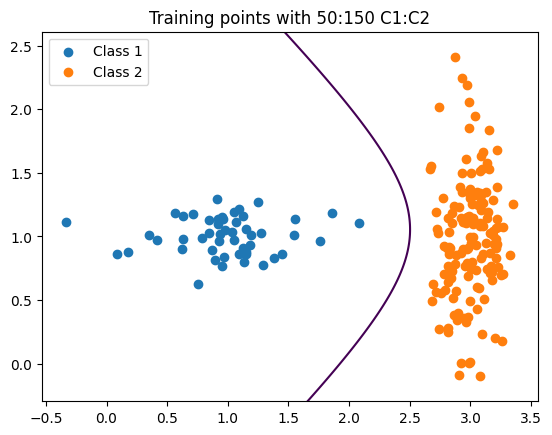

[[0.15652926 0.00760222]
 [0.00760222 0.0179387 ]]
[3.04519195 0.98057248]
[[ 6.52283702 -2.76430638]
 [-2.76430638 56.91688767]]
[[ 1.00000000e+00  2.77522775e-17]
 [-1.98407923e-18  1.00000000e+00]]


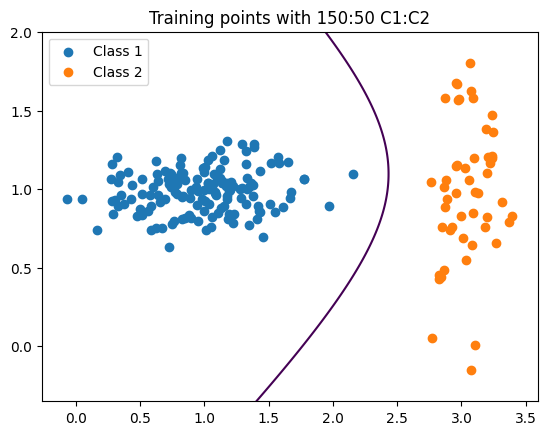

In [30]:
##########################################
#Part-4b)-0: Data Generation
##########################################
def calculate_y(W0, W1, W2, x):
    discriminant = W1**2 - 4*W2*(W0 - W2*x**2)
    if discriminant < 0:
        return None  # No real solutions
    else:
        y1 = (-W1 + discriminant**0.5) / (2*W2)
        y2 = (-W1 - discriminant**0.5) / (2*W2)
        return y1, y2

def plot_decision_boundary(ax, w, samples_c1, samples_c2, title):
    x_min, x_max = min(samples_c1[:,0].min(), samples_c2[:,0].min()), max(samples_c1[:,0].max(), samples_c2[:,0].max())
    y_min, y_max = min(samples_c1[:,1].min(), samples_c2[:,1].min()), max(samples_c1[:,1].max(), samples_c2[:,1].max())
    ax.scatter(samples_c1[:, 0], samples_c1[:, 1], label='Class 1')
    ax.scatter(samples_c2[:, 0], samples_c2[:, 1], label='Class 2')
    xx, yy = np.meshgrid(np.linspace(x_min-1, x_max-0.1, 650), np.linspace(y_min-1, y_max+1, 650))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    zz = [x.T @ w[2] @ x + w[1].T @ x + w[0] for x in mesh]
    zz = np.array(zz).reshape(xx.shape)
    ax.contour(xx, yy, zz, 'k', levels=[0])
    ax.set_xlim([x_min-0.2, x_max+0.2])
    ax.set_ylim([y_min-0.2, y_max+0.2])
    ax.set_title(title)
    ax.legend()

def decisionBoundary(X_train, Y_train):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w
    N1=0
    mean_1 = [0,0]
    mean_2 = [0,0]
    for i in range(Y_train.shape[0]):
      if(Y_train[i]==-1):
        N1+=1
        mean_1+=X_train[i]
      else:
        mean_2+=X_train[i]
    mean_1=mean_1/N1
    mean_2=mean_2/(Y_train.shape[0]-N1)
    p_c1 =N1/Y_train.shape[0]
    p_c2 = 1. - p_c1
    cov1 = np.zeros((2,2))
    cov2 = np.zeros((2,2))
    for i in range(Y_train.shape[0]):
      if(Y_train[i]==-1):
        h=np.reshape(X_train[i]-mean_1,(2,1))
        cov1+=h@h.T
      else:
        h=np.reshape(X_train[i]-mean_2,(2,1))
        cov2+=h@h.T
    cov1=cov1/(N1)
    cov2=cov2/(Y_train.shape[0]-N1)
    sigma1inv=np.linalg.inv(cov1)
    sigma2inv=np.linalg.inv(cov2)
    print(cov1)
    print(mean_2)
    print(sigma1inv)
    print(cov1@sigma1inv)
    w2=0.5*(sigma1inv-sigma2inv)
    w1=sigma2inv@mean_2-sigma1inv@mean_1
    w0=0.5*(mean_1.T@sigma1inv@mean_1-mean_2.T@sigma2inv@mean_2)+np.log(p_c1/p_c2)
    w=[w0,w1,w2]
    return w


mean1 = [1,1]
mean2 = [3,1]
cov1 = [[0.2,0.0],[0.0,0.02]]
cov2=[[0.02,0],[0,0.2]]

#Case1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov1, 100)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov2, 100)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.reshape(np.concatenate((np.full(100,-1), np.ones(100))),(200,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
w=decisionBoundary(tr_data,tr_targets)
ax=plt.subplot()
plot_decision_boundary(ax,w,class1_tr,class2_tr,"Training points with 100:100 C1:C2")
plt.show()


#Case2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov1, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov2, 150)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.reshape(np.concatenate((np.full(50,-1), np.ones(150))),(200,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
w=decisionBoundary(tr_data,tr_targets)
ax1=plt.subplot()
plot_decision_boundary(ax1,w,class1_tr,class2_tr,"Training points with 50:150 C1:C2")
plt.show()
#Case3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov1, 150)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov2, 50)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.reshape(np.concatenate((np.full(150,-1), np.ones(50))),(200,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
w=decisionBoundary(tr_data,tr_targets)
ax2=plt.subplot()
plot_decision_boundary(ax2,w,class1_tr,class2_tr,"Training points with 150:50 C1:C2")
plt.show()

<b> Report your observations </b>
1. When the spread of data in different classes is the same, any curved or quadratic shapes in the decision boundary disappear. So, the decision boundary becomes a straight line based only on the input features.

2. If the data in different classes have similar covariance matrix, the line that separates them is straight.

4. However, if the spread of data in different classes is different, the dividing line becomes more complex and becomes quadratic(non linear in nature).

5. With shared covariance, the decision boundary is a linear function of the input variables, denoted as w^Tx + w_0, where w is the weight vector and w_0 is the bias term

6. Without shared covariance, the decision boundary can be represented as a quadratic function of the input variables, denoted as x which satisfies the equation x^Tw_2x + w_1^Tx + w_0=0, where w_2 is the weight matrix, w_1 is the weight vector and w_0 is the bias term

7. As the ratio of C1:C2 increases the decision surface moves such that It includes more area for C1 class than C2


<b> Part-5) Classification using logistic regression ( Iterative reweighted least squares approach ): </b> logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. With the provided training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data, X_test.





a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

c). Evaluate the classification performance, i.e., compute the accuracy on the test data.

d). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

e). Introduce genuine outliers to one of the class datasets generated previously. Then, conduct Least Squares classification and Logistic Regression on this modified dataset. Plot the decision boundaries/regions and provide insights into the differences between their outcomes.


f). Report your observations


(400, 1)


 Accuracy with Logistic Regression: 90.5 


[[-8.01947208]
 [ 2.3146187 ]
 [ 3.3434436 ]]


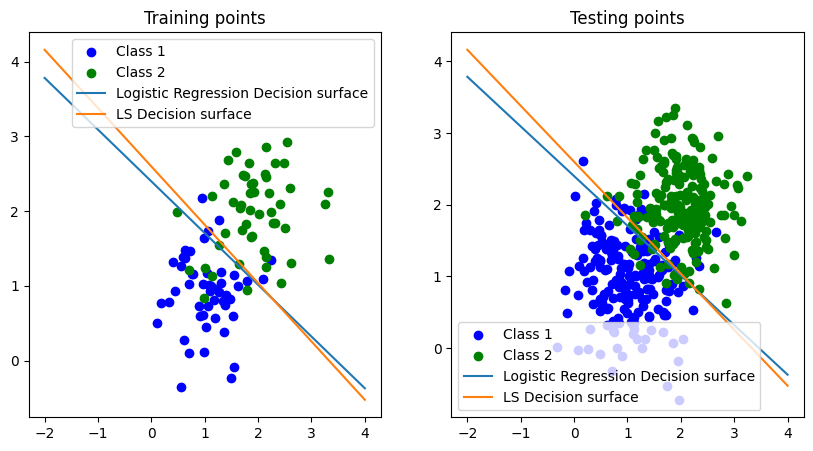

(400, 1)
[[-8.01947228]
 [ 2.31461874]
 [ 3.3434437 ]]


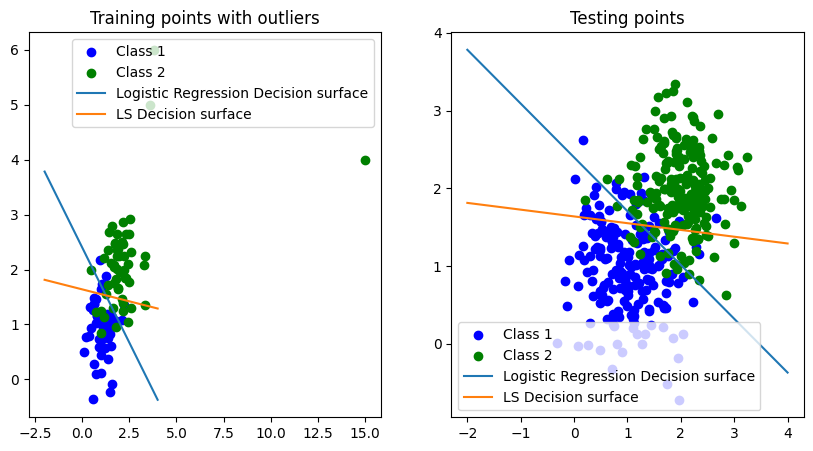

In [32]:
##################################################
#Part-5)-1: Data generation
##################################################

#Set the parameters of class distribution
mean1 = [1,1]            #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0.0],[0,0.3]]  #Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))  # Combine class1 training and class2 training data
tr_targets = np.reshape(np.concatenate((np.zeros(50), np.ones(50))),(100,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.concatenate((class1_te, class2_te))  # Combine class1 testing and class2 testing data
te_targets = np.reshape(np.concatenate((np.zeros(200), np.ones(200))),(400,1))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.       #Class labels. Assign the value "0" to class1 and the value "1" to class2.


##################################################
#Part-5)-b: Complete the below logistic regression function
##################################################
def sigmoid(a):
  return 1/(1+np.exp(-a))

def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data

  max_iter = 1000 #max number of ierations for parameter update
  threshold = 0 #threshold for classification
  X=np.hstack((np.ones((X_train.shape[0],1)),X_train))
  Y=Y_train.reshape((X_train.shape[0],1))         #Data. Append ones to the training data to take care of the bias
  w = np.reshape([0,0,0],(3,1))         #Initialize the weight vector
  for iter in range(0,max_iter,1):
    t=X@w
    preds = sigmoid(t)   #Predictions on X. Sigmoid(w^T.x)
    t=LS_hard(preds,0,1)
    error = np.linalg.norm(preds-Y_train)   #Difference between preds and Y_train
    R=np.identity(X.shape[0])
    for i in range(X.shape[0]):
      R[i][i]=preds[i,0]*(1-preds[i,0])
    rt=np.linalg.inv(X.T@R@X)
    delt=rt@X.T@(preds-Y)
    w=w-delt
  Xt=np.hstack((np.ones((X_test.shape[0],1)),X_test))
  t=Xt@w
  preds = sigmoid(t)   #Predictions on X. Sigmoid(w^T.x)
  t=LS_hard(preds,0,1)
  print(t.shape)
  #Return the predicted test labels
  return t,w




###############################################
#Part-5)-c:
###############################################
def LR_Accuracy(Y_test, Y_pred):
  #Inputs: Ground truth and predicted lables of test data
  #Outputs: Accuracy
  count=0
  for i in range(Y_test.shape[0]):
    if(Y_test[i]==Y_pred[i]):
      count+=1
  #Compute and return the accuracy
  return (count*100/Y_test.shape[0])

Y_pred,w = Logistic_Regression(tr_data, tr_targets, te_data)
acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', acc, '\n\n')


##########################################
#Part-5)-d: Plot the decision regions. Overlay the test points on the plot
##########################################
fig,plot1=plt.subplots(1,2,figsize=(10, 5))
plot1[0].scatter(tr_data[:50,0],tr_data[:50,1],color='blue',label="Class 1")
plot1[0].scatter(tr_data[50:,0],tr_data[50:,1],color='green',label="Class 2")
plot1[1].scatter(te_data[:200,0],te_data[:200,1],color='blue',label="Class 1")
plot1[1].scatter(te_data[200:,0],te_data[200:,1],color='green',label="Class 2")
plot1[0].set_title("Training points")
plot1[1].set_title("Testing points")
print(w)
xvalues=np.linspace(-2,4,1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
predictions,w = LS_Classify(tr_data, tr_targets, te_data)
yvalues2=((0.5-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1[0].plot(xvalues,yvalues,label="Logistic Regression Decision surface")
plot1[1].plot(xvalues,yvalues,label="Logistic Regression Decision surface")
plot1[0].plot(xvalues,yvalues2,label="LS Decision surface")
plot1[1].plot(xvalues,yvalues2,label="LS Decision surface")
plot1[0].legend()
plot1[1].legend()
plt.show()







##########################################
#Part-5)-e: Logistic regression for the data with true outliers
##########################################

outliers=np.array([[15,4],[3.6,5],[3.8,6]])
tr_data=np.concatenate((tr_data,outliers))
tr_targets=np.concatenate((tr_targets,np.array([[1],[1],[1]])))
Y_pred,w = Logistic_Regression(tr_data, tr_targets, te_data)
acc = LR_Accuracy(te_targets, Y_pred)
fig,plot1=plt.subplots(1,2,figsize=(10, 5))
plot1[0].scatter(tr_data[:50,0],tr_data[:50,1],color='blue',label="Class 1")
plot1[0].scatter(tr_data[50:,0],tr_data[50:,1],color='green',label="Class 2")
plot1[1].scatter(te_data[:200,0],te_data[:200,1],color='blue',label="Class 1")
plot1[1].scatter(te_data[200:,0],te_data[200:,1],color='green',label="Class 2")
plot1[0].set_title("Training points with outliers")
plot1[1].set_title("Testing points")
print(w)
xvalues=np.linspace(-2,4,1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
predictions,w = LS_Classify(tr_data, tr_targets, te_data)
yvalues2=((0.5-w[0,0]-w[1,0]*xvalues)/w[2,0])
plot1[0].plot(xvalues,yvalues,label="Logistic Regression Decision surface")
plot1[1].plot(xvalues,yvalues,label="Logistic Regression Decision surface")
plot1[0].plot(xvalues,yvalues2,label="LS Decision surface")
plot1[1].plot(xvalues,yvalues2,label="LS Decision surface")
plot1[0].legend()
plot1[1].legend()
plt.show()










<b> Observations: </b>

1. The logistic model approximates the underlying distribution of data and uses the sigmoidal kernel to find the predictions.

2. The Logistic model is providing an accuracy of around 90% for the given set of data.

3. The logistic model is better at handling the true outliers and doesn't get affected by the very true outliers.

4. The logistic model is a mix of perceptron and LS models and provides a higher accuracy and also handles the outliers.

<b> Part (6) : Estimating the parameters of Gaussian Mixture Models (GMM) using Expectation-Maximization (EM) algorithm </b>


<dt> <b> a. Generating synthetic data : </b>  This part describes the steps involved in generating the synthetic data. </dt>


<dt>  1. Let us consider the GMM with Bivariate Gaussians   </dt>
<dd>  - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this asignment.  </dd>
<br>
<dt>  <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>   </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>

<dd>  - Pick one Gaussian following the selection probability as  $\pi$    </dd>
<dd>  - Sample the data point from the selected Bivariate Gaussian distribution    </dd>
<dd>  - Repeat the process N times to get the entire data set  </dd>
<dt>  2.Create the synthetic data set with the number of mixtures as 2.  </dt>
<dt>  3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt> </dd>

<dt> <b> b. Implementation of Expectation and Maximization (EM) algorithm : </b> This part focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM). </dt>  

<dt>  1. Chose the number of mixtures (M) and initialize the parameters of GMM model  </dt>
<dd>  - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability.  </dd>

<dt>   2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM  </dt>
<br>

<dd>  <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center>  </dd>

<br>

<dd>   Where N is the total number of data points and M is the total number of Gaussians in GMM   </dd>

<dd>   - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point   </dd>

<dd>   - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian   </dd>


<dt>   3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood. </dt>

<dd>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
 </dd>

<dd>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
 </dd>

<dd>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
 </dd>

<dd>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
 </dd>

<dt>  4. Compute the log-likelihood with the updated parameters  </dt>
<dt>   5. Repeat the expectation and maximization steps untill convergence  </dt>

<dt>  <b> c. Illustration of EM iterations </b>  </dt>

<dt>   5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points.  </dt>

<dt>  <b> d. Understanding the issues with EM algorithm </b>  </dt>
<dt>   6. Check the influence of initialization on the convergence of the EM algorithm and fit quality.  </dt>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section    </dd>
<dt>   6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </dt>
<dd>   - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </dd>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section  </dd>


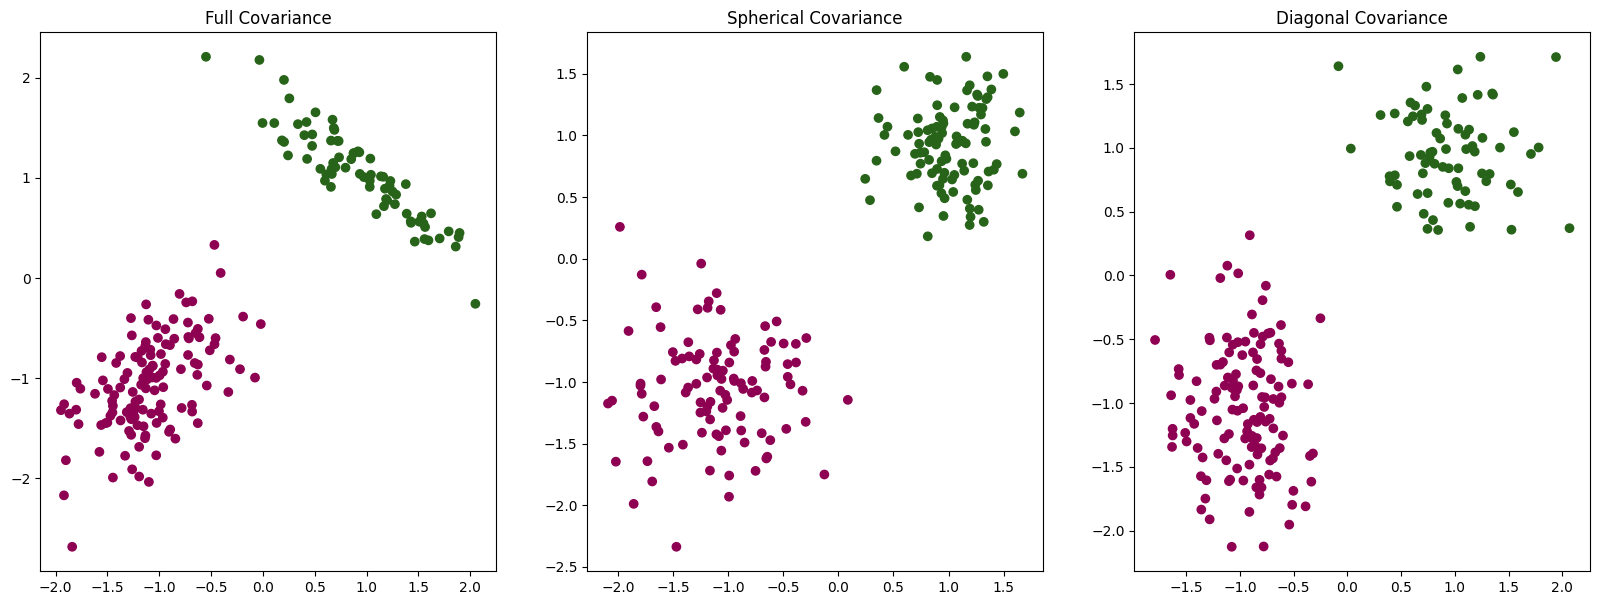

In [39]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-a: Generating synthetic data
##########################################

def generateData(pi, mu, sigma, N):
    ############################################################################
    #pi = weights of Gaussians, mu = mean of Gaussians, sigma = convariance of Gaussians, N = number of data points
    #Steps
    #1.Select th Gaussian following the probability distribution as pi
    #2.Sample the data points from the selected Gaussian
    #3.Repeat the process N times to get N data points
    #4.Return the sampled data
    ############################################################################
    #You may look into "random.choices" and "np.random.multivariate_normal" functions
    X=[]
    targets=[]
    for i in range(N):
        k = rand.choices(range(len(pi)), weights=pi)[0]
        # Sample data point from the selected Gaussian
        targets.append(k)
        X.append(np.random.multivariate_normal(mu[k], sigma[k]))
    return np.asarray(X), np.asarray(targets)
    ############################################################################


############################################################################
#Chose the appropriate means ($\mu$), covariances ($\Sigma$), and weights
############################################################################
mu1 = np.array([-1,-1])   #Mean vector of component1 in GMM
sig1 = np.array([[0.15, 0.1], [0.1, 0.25]]) #Full covariance matrix of component1 in GMM
mu2 =   np.array([1.0, 1.0])  #Mean vector of component2 in GMM
sig2 = np.array([[0.3, -0.25], [-0.25, 0.25]]) #Full covariance matrix of component2 in GMM
pi =   [0.6, 0.4]   #Prior probabilities

n_points = 200 #Number of points

# Spherical covariances
sig1_s = np.array([[0.2,0],[0,0.2]])
sig2_s = np.array([[0.1,0],[0,0.1]])
# Diagonal covariances
sig1_d = np.array([[0.1,0],[0,0.2]])
sig2_d = np.array([[0.2,0],[0,0.1]])

############################################################################
#Create the synthetic data set
############################################################################

data_full, labels_full = generateData(pi, [mu1, mu2], [sig1, sig2], 200)
data_sp, labels_sp = generateData(pi, [mu1, mu2], [sig1_s, sig2_s], 200)
data_dg, labels_dg = generateData(pi, [mu1, mu2], [sig1_d, sig2_d], 200)

############################################################################
#Plot the synthetic data set
############################################################################

fig, ax = plt.subplots(1,3, figsize=(20,7))

#Visualize the data sampled from the GMM with full covariance matrix
ax[0].scatter(data_full[:, 0], data_full[:, 1], c=labels_full, cmap='PiYG')
ax[0].set_title('Full Covariance')

#Visualize the data sampled from the GMM with spherical covariance matrix
ax[1].scatter(data_sp[:, 0], data_sp[:, 1], c=labels_sp, cmap='PiYG')
ax[1].set_title('Spherical Covariance')

#Visualize the data sampled from the GMM with diagonal covariance matrix
ax[2].scatter(data_dg[:, 0], data_dg[:, 1], c=labels_dg, cmap='PiYG')
ax[2].set_title('Diagonal Covariance')

plt.show()


In [ ]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-b: Implimentation of Expectation-Maximization (EM) algorithm
##########################################

############################################################################
#Write a function to compute the log-likelihood of the data given the parameters
############################################################################
def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
  #Inputs: data, parameters of GMM model
  #Outputs: likelihood





############################################################################
#Write a function for the expectation step
############################################################################
def expectation(data, pi, mu, sigma):
  #Inputs: data, parameters of GMM model
  #Outputs: gamma
  gamma =
  for n in range(len(data)):
    #Iterate through the data points
    for k in range(len(pi)):
      #Iterate through the components in GMM
      numerator =
      denominator =
      gamma[n,k] = numerator/denominator
  return gamma



############################################################################
#Write a function for the maximization step.
############################################################################
def maximization(data, gamma):
  #Inputs: data, gamma
  #Outputs: Updated parameters of GMM model

  #Update mu


  #Update sigma


  #Update pi



  #Return the parameters of GMM model
  return pi, mu, sigma


#Complete the below function. It plots the contours
def plot_contours(data, labels, pi, mu, sigma):


  plt.show()



############################################################################
#Run the expectation and maximzation algorithm to estimate the parameters
############################################################################
data =     #data to run EM-algorithm
labels =   #labels
N =        #number of input examples
D =        #data dimension
M =        #no.of components in GMM

pi =       #Initialize the prior probabilities
mu =       #Initialize the mean vectors
sigma =    #Initialize the covariance matrices


nsteps =   #Number of steps to run EM algorithm
for index in range(0,nsteps,1):

  #Compute the likelihood
  ll = likelihood(data, pi, mu, sigma, log_likelihood=True)

  #Plot the contours
  plot_contours(data, labels, pi, mu, sigma)

  #Expectation step
  gamma = expectation(data, pi, mu, sigma)

  #Maximization step
  pi, mu, sigma = maximization(data, gamma)





In [ ]:
############################################################################
##Part-6)-d: Understand the issues with EM algorithm
############################################################################









<b> Report your observations </b>

1.

2.

3.

